<h1 align="center"> Python for the Humanities and Social Sciences <br> <em>Data Manipulation</em> </h1>

## Info
- Scott Bailey (CIDR), <em>scottbailey@stanford.edu</em>
- Javier de la Rosa (CIDR), <em>versae@stanford.edu</em>

## Goal
By the end of our workshop today, we hope you'll be able to load in data into a Pandas `DataFrame`, perform basic cleaning and analysis, and visualize relevant aspects of a dataset. We will work with a dataset of tweets collected during the release of the Apple Watch.

## Topics
- Pandas Series and DataFrame
- Loading data in, null and missing data
- Describing data
- Column manipulation
- String manipulation
- Split-Apply-Combine
- Plotting:
  - Basic charts (line, bar, pie)
  - Histograms
  - Scatter plots
  - Boxplots, violinplots

## Jupyter Notebooks and Azure

Jupyter notebooks are a way to write and run Python code in an interactive way. They're quickly becoming a standard way of putting together data, code, and written explanation or visualizations into a single document and sharing that. There are a lot of ways that you can run Jupyter notebooks, including just locally on your computer, but we've decided to use the Azure notebook platform, from Microsoft. This is a cloud platform that allows you to create libraries, which are effectively project folders and virtual environments that can contain static files and Python notebooks. They come with a number of popular libraries pre-installed, and allow you to install other libraries as needed.

Using the Azure notebook platform allows us to focus on learning and writing Python in the workshop rather than on setting up Python, which sometimes can take a bit of extra work depending on platforms and other installed applications. If you'd like to install a Python distribution locally, though, we have some instructions (with gifs!) on installing Python through the Anaconda distribution, which will also help you handle virtual environments: https://github.com/sul-cidr/python_workshops/blob/master/setup.ipynb

If you run into problems, or would like to look at other ways of installing Python or handling virtual environments, feel free to send us an email. 

For now, go ahead to https://notebooks.azure.com and login with your Stanford ID and password.

## Environment
For setting using Anaconda or their own local installation of Jupyter Notebooks locally, for this workshop we'll need an environment with the following packages:
- `matplotlib`
- `pandas`
- `requests`
- `sqlalchemy`
- `seaborn`, available in the `conda-forge` channel

##  Copying this notebook
Go to https://notebooks.azure.com/versae/libraries/cidr-data-manipulation
    
From there, click "Clone" to create a full copy of this library. 

## Pandas

From Jake Vanderplas' book [**Python Data Science Handbook**](http://shop.oreilly.com/product/0636920034919.do) (from which some code excerpts are used in this workshop):

> Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a `DataFrame`. `DataFrame`s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

In [1]:
import numpy as np  # np becomes the namespace of numpy
import pandas as pd
import requests

# Set some options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

There are three main data structures in Pandas: `Series`, `DataFrame`, and `Index`. Pandas has a very decent [documentation](http://pandas.pydata.org/pandas-docs/stable/), and using Jupyter, any method help can be shown by appending the a `?` to the end and running the cell.

In [2]:
# For example
pd.isnull?

## Data I/O

Pandas provides a few methods to load in and out data in CSVs, Excel spreadsheets, HDF, JSON, or even SQL databases.

For example, click in the next URL of a CSV file containing twitter data during the release of the Apple Watch: http://bit.ly/python_workshop_data

In [4]:
# Pandas can fetch data directly from the URL
pd.read_csv("https://raw.githubusercontent.com/sul-cidr/python_workshops/master/data/twitter_apple.csv")

,contributors,created_at,favorite_count,favorited,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,hashtags,media,symbols,trends,urls,user_mentions,lat,lon,country,conuntry_code
0,NaN,2015-03-09 21:01:01.000,0.0,0.0,low,575038603887251456,5.750386e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://ift.tt/1AXDXIR,NaN,NaN,NaN,NaN,NaN
1,NaN,2015-03-09 21:08:06.000,0.0,0.0,low,575040384482590720,5.750404e+17,NaN,NaN,NaN,...,NaN,http://twitter.com/MisterC00l/status/575013358...,NaN,NaN,NaN,MisterC00l,NaN,NaN,NaN,NaN
2,NaN,2015-03-09 21:21:47.000,0.0,0.0,low,575043831525146624,5.750438e+17,NaN,NaN,NaN,...,android,http://twitter.com/androidcentral/status/57502...,NaN,NaN,http://phon.es/yljt,androidcentral,NaN,NaN,NaN,NaN
3,NaN,2015-03-09 21:27:31.000,0.0,0.0,low,575045273384263680,5.750453e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://huff.to/1KMYiMd,LeHuffPost,NaN,NaN,NaN,NaN
4,NaN,2015-03-09 21:01:23.000,0.0,0.0,low,575038696988131328,5.750387e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://japan.cnet.com/sp/apple_watch/35061515/...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,NaN,2015-03-09 21:21:24.000,0.0,0.0,low,575043732472528896,5.750437e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://www.apple.com/ru/watch/battery.html,wylsacom,NaN,NaN,NaN,NaN
9981,NaN,2015-03-09 21:32:28.000,0.0,0.0,low,575046518094200832,5.750465e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9982,NaN,2015-03-09 21:27:59.000,0.0,0.0,low,575045390338256896,5.750454e+17,NaN,NaN,NaN,...,NaN,http://twitter.com/SAI/status/5750453903382568...,NaN,NaN,http://read.bi/1AXKvrd,NaN,NaN,NaN,NaN,NaN
9983,NaN,2015-03-09 21:27:31.000,0.0,0.0,low,575045274558578688,5.750453e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"http://apple.com/watch,https://amp.twimg.com/v...",AppStore,NaN,NaN,NaN,NaN


Let's save the previous data to a local file.

In [5]:
url = "https://raw.githubusercontent.com/sul-cidr/python_workshops/master/data/twitter_apple.csv"
try:
    with open("twitter.csv", "wb") as file:
        file.write(requests.get(url).content)
except:
    pd.read_csv(url).to_csv("twitter.csv", index=None)

In [6]:
pd.read_csv("twitter.csv")

,contributors,created_at,favorite_count,favorited,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,hashtags,media,symbols,trends,urls,user_mentions,lat,lon,country,conuntry_code
0,NaN,2015-03-09 21:01:01.000,0.0,0.0,low,575038603887251456,5.750386e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://ift.tt/1AXDXIR,NaN,NaN,NaN,NaN,NaN
1,NaN,2015-03-09 21:08:06.000,0.0,0.0,low,575040384482590720,5.750404e+17,NaN,NaN,NaN,...,NaN,http://twitter.com/MisterC00l/status/575013358...,NaN,NaN,NaN,MisterC00l,NaN,NaN,NaN,NaN
2,NaN,2015-03-09 21:21:47.000,0.0,0.0,low,575043831525146624,5.750438e+17,NaN,NaN,NaN,...,android,http://twitter.com/androidcentral/status/57502...,NaN,NaN,http://phon.es/yljt,androidcentral,NaN,NaN,NaN,NaN
3,NaN,2015-03-09 21:27:31.000,0.0,0.0,low,575045273384263680,5.750453e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://huff.to/1KMYiMd,LeHuffPost,NaN,NaN,NaN,NaN
4,NaN,2015-03-09 21:01:23.000,0.0,0.0,low,575038696988131328,5.750387e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://japan.cnet.com/sp/apple_watch/35061515/...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9980,NaN,2015-03-09 21:21:24.000,0.0,0.0,low,575043732472528896,5.750437e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://www.apple.com/ru/watch/battery.html,wylsacom,NaN,NaN,NaN,NaN
9981,NaN,2015-03-09 21:32:28.000,0.0,0.0,low,575046518094200832,5.750465e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9982,NaN,2015-03-09 21:27:59.000,0.0,0.0,low,575045390338256896,5.750454e+17,NaN,NaN,NaN,...,NaN,http://twitter.com/SAI/status/5750453903382568...,NaN,NaN,http://read.bi/1AXKvrd,NaN,NaN,NaN,NaN,NaN
9983,NaN,2015-03-09 21:27:31.000,0.0,0.0,low,575045274558578688,5.750453e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"http://apple.com/watch,https://amp.twimg.com/v...",AppStore,NaN,NaN,NaN,NaN


Let's reload the CSV but this time from the local file, specifying an index column and saving it into a variable, `df`.

In [7]:
df = pd.read_csv("twitter.csv", index_col="created_at")
df

,contributors,favorite_count,favorited,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,hashtags,media,symbols,trends,urls,user_mentions,lat,lon,country,conuntry_code
created_at,,,,,,,,,,,,,,,,,,,,,
2015-03-09 21:01:01.000,NaN,0.0,0.0,low,575038603887251456,5.750386e+17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://ift.tt/1AXDXIR,NaN,NaN,NaN,NaN,NaN
2015-03-09 21:08:06.000,NaN,0.0,0.0,low,575040384482590720,5.750404e+17,NaN,NaN,NaN,NaN,...,NaN,http://twitter.com/MisterC00l/status/575013358...,NaN,NaN,NaN,MisterC00l,NaN,NaN,NaN,NaN
2015-03-09 21:21:47.000,NaN,0.0,0.0,low,575043831525146624,5.750438e+17,NaN,NaN,NaN,NaN,...,android,http://twitter.com/androidcentral/status/57502...,NaN,NaN,http://phon.es/yljt,androidcentral,NaN,NaN,NaN,NaN
2015-03-09 21:27:31.000,NaN,0.0,0.0,low,575045273384263680,5.750453e+17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://huff.to/1KMYiMd,LeHuffPost,NaN,NaN,NaN,NaN
2015-03-09 21:01:23.000,NaN,0.0,0.0,low,575038696988131328,5.750387e+17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://japan.cnet.com/sp/apple_watch/35061515/...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-09 21:21:24.000,NaN,0.0,0.0,low,575043732472528896,5.750437e+17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://www.apple.com/ru/watch/battery.html,wylsacom,NaN,NaN,NaN,NaN
2015-03-09 21:32:28.000,NaN,0.0,0.0,low,575046518094200832,5.750465e+17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09 21:27:59.000,NaN,0.0,0.0,low,575045390338256896,5.750454e+17,NaN,NaN,NaN,NaN,...,NaN,http://twitter.com/SAI/status/5750453903382568...,NaN,NaN,http://read.bi/1AXKvrd,NaN,NaN,NaN,NaN,NaN


Now we can just save the clean data to any format supported by Pandas

In [8]:
df.to_csv("twitter_indexed.csv", encoding="utf8")

Including a new or existing database

In [9]:
!rm database.sqlite
from sqlalchemy import create_engine
engine = create_engine("sqlite:///database.sqlite", echo=False)
df.to_sql("twitter_indexed", con=engine, if_exists="replace")  # if_exists {‘fail’, ‘replace’, ‘append’} default ‘fail’

Let's check the data is there

In [10]:
engine.execute("SELECT * FROM twitter_indexed LIMIT 5").fetchall()

[('2015-03-09 21:01:01.000', None, 0.0, 0.0, 'low', 575038603887251456, 5.7503860388725146e+17, None, None, None, None, None, 'en', None, None, 0.0, 0.0, 0.0, '<a href="http://ifttt.com" rel="nofollow">IFTTT</a>', "'Gold On My MacBook' is the perfect rap song for today's Apple news http://t.co/ARphq3OmgT", '2015-03-09 21:01:01.524', 0.0, 2323317534, 'pepemvalle', 'Jose Valle', 'es', 'Madrid', None, None, None, None, 'http://ift.tt/1AXDXIR', None, None, None, None, None),
 ('2015-03-09 21:08:06.000', None, 0.0, 0.0, 'low', 575040384482590720, 5.750403844825907e+17, None, None, None, None, None, 'fr', None, None, 0.0, 0.0, 0.0, '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'RT @MisterC00l: Noyer son Apple Watch en or à 10 000€ dans son Jacuzzi deviendra le premier problème des riches en avril ^^. http://t.co/5W…', '2015-03-09 21:08:06.051', 0.0, 2391351001, 'Karma_eb155', 'Karma155', 'fr', 'Champagne-Ardenne', None, 'http://twitter.com/MisterC00l

## `DataFrame` and `Series`

A `DataFrame` is a two-dimensional array with both flexible row indices and flexible column names. It can be seen as a generalization of a two-dimensional NumPy array, or a specialization of a dictionary in which each column name maps to a `Series` of column data. A `Series` is a one-dimensional array of indexed data. It can be seem as a specialized dictionary or a generalized NumPy array.

A `DataFrame` is made up of `Series` in a similar way in which a table is made up of columns. The only restriction is that each column must be of the same data type.

In [11]:
df = pd.read_csv("twitter.csv")
df.columns

Index(['contributors', 'created_at', 'favorite_count', 'favorited',
       'filter_level', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'lang', 'limit',
       'place', 'possibly_sensitive', 'retweet_count', 'retweeted', 'source',
       'text', 'timestamp_ms', 'truncated', 'user_id', 'user_screen_name',
       'user_name', 'user_lang', 'user_location', 'hashtags', 'media',
       'symbols', 'trends', 'urls', 'user_mentions', 'lat', 'lon', 'country',
       'conuntry_code'],
      dtype='object')

In [12]:
len(df.columns)

37

Accessing columns can be done using the dot notation, `df.column_name`, or the dictionary notation, `df["column_name"]`.

In [13]:
df["urls"]

0                                   http://ift.tt/1AXDXIR
1                                                     NaN
2                                     http://phon.es/yljt
3                                  http://huff.to/1KMYiMd
4       http://japan.cnet.com/sp/apple_watch/35061515/...
                              ...                        
9980           http://www.apple.com/ru/watch/battery.html
9981                                                  NaN
9982                               http://read.bi/1AXKvrd
9983    http://apple.com/watch,https://amp.twimg.com/v...
9984                                                  NaN
Name: urls, dtype: object

In [14]:
df.urls

0                                   http://ift.tt/1AXDXIR
1                                                     NaN
2                                     http://phon.es/yljt
3                                  http://huff.to/1KMYiMd
4       http://japan.cnet.com/sp/apple_watch/35061515/...
                              ...                        
9980           http://www.apple.com/ru/watch/battery.html
9981                                                  NaN
9982                               http://read.bi/1AXKvrd
9983    http://apple.com/watch,https://amp.twimg.com/v...
9984                                                  NaN
Name: urls, dtype: object

`DataFrame`s can be sliced to extract just a set of the columns you are interested in. We just pass in a list of the columns we need to the slice and get a `DataFrame` back.

In [15]:
df[["urls", "text"]]

,urls,text
0,http://ift.tt/1AXDXIR,'Gold On My MacBook' is the perfect rap song f...
1,NaN,RT @MisterC00l: Noyer son Apple Watch en or à ...
2,http://phon.es/yljt,RT @androidcentral: Apple's new MacBook cable ...
3,http://huff.to/1KMYiMd,RT @LeHuffPost: Apple Watch Edition: un prix s...
4,http://japan.cnet.com/sp/apple_watch/35061515/...,＜CNET Japan＞「Apple Watch」日本でも4月10日より予約開始--4万28...
...,...,...
9980,http://www.apple.com/ru/watch/battery.html,RT @wylsacom: Все про батарею Apple Watch:\nht...
9981,NaN,MT: Was totally gonna buy an Apple WATCH Editi...
9982,http://read.bi/1AXKvrd,Apple has installed a permanent undeletable Ap...
9983,"http://apple.com/watch,https://amp.twimg.com/v...",RT @AppStore: The Watch is coming. 4.24.15. h...


All `DataFrame`s are indexed. If an index is not explictly provided Pandas will asign one, giving each row a consecutive number. `Series` and slices keep these indices, which make possible further operations such as merging or columns manipulation.

`DataFrames` are designed to operate at the column level, not at the row level. However, a subset of rows can be visualized easily using a slice like in any Python list.

In [16]:
df[10:15]

,contributors,created_at,favorite_count,favorited,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,hashtags,media,symbols,trends,urls,user_mentions,lat,lon,country,conuntry_code
10,NaN,2015-03-09 21:34:17.000,0.0,0.0,low,575046974627389440,5.750470e+17,mimseitef,5.750461e+17,5.750461e+17,...,NaN,NaN,NaN,NaN,NaN,"mimseitef,AhMaDeWiS",NaN,NaN,NaN,NaN
11,NaN,2015-03-09 21:22:43.000,0.0,0.0,low,575044064896282624,5.750441e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://ift.tt/1Gz2nk9,NaN,NaN,NaN,NaN,NaN
12,NaN,2015-03-09 21:33:11.000,0.0,0.0,low,575046700022136832,5.750467e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://engt.co/1CWTTlO,engadget,NaN,NaN,NaN,NaN
13,NaN,2015-03-09 21:04:08.000,0.0,0.0,low,575039387488030720,5.750394e+17,NaN,NaN,NaN,...,NaN,http://twitter.com/oneVerge/status/57503938748...,NaN,NaN,http://www.theverge.com/2015/3/9/8176305/apple...,NaN,NaN,NaN,NaN,NaN
14,NaN,2015-03-09 21:02:39.000,0.0,0.0,low,575039012982800384,5.750390e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df[10:15].urls

10                                                  NaN
11                                http://ift.tt/1Gz2nk9
12                               http://engt.co/1CWTTlO
13    http://www.theverge.com/2015/3/9/8176305/apple...
14                                                  NaN
Name: urls, dtype: object

In [18]:
df.urls[10:15]

10                                                  NaN
11                                http://ift.tt/1Gz2nk9
12                               http://engt.co/1CWTTlO
13    http://www.theverge.com/2015/3/9/8176305/apple...
14                                                  NaN
Name: urls, dtype: object

In [19]:
df[["urls"]][10:15]

,urls
10,NaN
11,http://ift.tt/1Gz2nk9
12,http://engt.co/1CWTTlO
13,http://www.theverge.com/2015/3/9/8176305/apple...
14,NaN


And you can even access individual rows and mix index and rows.

In [20]:
df[["urls", "text"]].loc[2:5]  # for non numeric indices, labels

,urls,text
2,http://phon.es/yljt,RT @androidcentral: Apple's new MacBook cable ...
3,http://huff.to/1KMYiMd,RT @LeHuffPost: Apple Watch Edition: un prix s...
4,http://japan.cnet.com/sp/apple_watch/35061515/...,＜CNET Japan＞「Apple Watch」日本でも4月10日より予約開始--4万28...
5,http://goo.gl/46E4Ol,"LintasME: Akhirnya, Apple Watch Resmi Diperken..."


In [21]:
df[["urls", "text"]][2:5]

,urls,text
2,http://phon.es/yljt,RT @androidcentral: Apple's new MacBook cable ...
3,http://huff.to/1KMYiMd,RT @LeHuffPost: Apple Watch Edition: un prix s...
4,http://japan.cnet.com/sp/apple_watch/35061515/...,＜CNET Japan＞「Apple Watch」日本でも4月10日より予約開始--4万28...


In [22]:
df[["urls", "text"]].iloc[2:5]  # for nummeric indices, position based

,urls,text
2,http://phon.es/yljt,RT @androidcentral: Apple's new MacBook cable ...
3,http://huff.to/1KMYiMd,RT @LeHuffPost: Apple Watch Edition: un prix s...
4,http://japan.cnet.com/sp/apple_watch/35061515/...,＜CNET Japan＞「Apple Watch」日本でも4月10日より予約開始--4万28...


And the good ol' `.ix[]`, which is now deprecated and will be revomved from Pandas soon.

In [23]:
df.ix[2:5, ["urls", "text"]]  # for mixed indices and columns

,urls,text
2,http://phon.es/yljt,RT @androidcentral: Apple's new MacBook cable ...
3,http://huff.to/1KMYiMd,RT @LeHuffPost: Apple Watch Edition: un prix s...
4,http://japan.cnet.com/sp/apple_watch/35061515/...,＜CNET Japan＞「Apple Watch」日本でも4月10日より予約開始--4万28...
5,http://goo.gl/46E4Ol,"LintasME: Akhirnya, Apple Watch Resmi Diperken..."


<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Given the `DataFrame` defined above, write an expression to extract a `DataFrame` with the columns `text`, `user_screen_name`, `user_name`, `user_lang`, and `hashtags`. Show only the first 5 rows of it.
<br/>
<!-- * **Hint**: You could ...* -->
</p>
</div>

In [24]:
# Write here your solution
df[["text", "user_screen_name", "user_name", "user_lang", "hashtags"]][:5]

,text,user_screen_name,user_name,user_lang,hashtags
0,'Gold On My MacBook' is the perfect rap song f...,pepemvalle,Jose Valle,es,NaN
1,RT @MisterC00l: Noyer son Apple Watch en or à ...,Karma_eb155,Karma155,fr,NaN
2,RT @androidcentral: Apple's new MacBook cable ...,IkerFuentes97,JackÜ,en,android
3,RT @LeHuffPost: Apple Watch Edition: un prix s...,TranNathalie,Tran Nathalie,fr,NaN
4,＜CNET Japan＞「Apple Watch」日本でも4月10日より予約開始--4万28...,x1aw4w8i,キャッハー,ja,NaN


## Indexing and Expressions

Operations performed using a column or `Series` are broadcast to each of the elements contained.

In [25]:
df["id"] * 2

0       1150077207774502912
1       1150080768965181440
2       1150087663050293248
3       1150090546768527360
4       1150077393976262656
               ...         
9980    1150087464945057792
9981    1150093036188401664
9982    1150090780676513792
9983    1150090549117157376
9984    1150091959519199232
Name: id, dtype: int64

In [26]:
"@" + df["user_name"] + ": " + df["text"]

0       @Jose Valle: 'Gold On My MacBook' is the perfe...
1       @Karma155: RT @MisterC00l: Noyer son Apple Wat...
2       @JackÜ : RT @androidcentral: Apple's new MacBo...
3       @Tran Nathalie: RT @LeHuffPost: Apple Watch Ed...
4       @キャッハー: ＜CNET Japan＞「Apple Watch」日本でも4月10日より予約...
                              ...                        
9980    @Jong Yong: RT @wylsacom: Все про батарею Appl...
9981    @Serge Rubinstein: MT: Was totally gonna buy a...
9982    @BI Tech: Apple has installed a permanent unde...
9983    @Eric Moore: RT @AppStore: The Watch is coming...
9984    @Мария Миронова: Apple может продать 15,4 млн ...
dtype: object

In [27]:
df["id"] > 575043732472528896

0       False
1       False
2        True
3        True
4       False
        ...  
9980    False
9981     True
9982     True
9983     True
9984     True
Name: id, dtype: bool

Which allows for a more advanced and useful indexing as you can pass in an expression to a `DataFrame` to select content.

In [28]:
df[df["id"] > 575043732472528896]

,contributors,created_at,favorite_count,favorited,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,hashtags,media,symbols,trends,urls,user_mentions,lat,lon,country,conuntry_code
2,NaN,2015-03-09 21:21:47.000,0.0,0.0,low,575043831525146624,5.750438e+17,NaN,NaN,NaN,...,android,http://twitter.com/androidcentral/status/57502...,NaN,NaN,http://phon.es/yljt,androidcentral,NaN,NaN,NaN,NaN
3,NaN,2015-03-09 21:27:31.000,0.0,0.0,low,575045273384263680,5.750453e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://huff.to/1KMYiMd,LeHuffPost,NaN,NaN,NaN,NaN
5,NaN,2015-03-09 21:31:17.000,0.0,0.0,low,575046219401011200,5.750462e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://goo.gl/46E4Ol,NaN,NaN,NaN,NaN,NaN
6,NaN,2015-03-09 21:22:35.000,0.0,0.0,low,575044031345860608,5.750440e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://erict.co/1CWSf3v,ClickZ,NaN,NaN,NaN,NaN
7,NaN,2015-03-09 21:32:35.000,0.0,0.0,low,575046549794766848,5.750465e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,NaN,2015-03-09 21:26:00.000,0.0,0.0,low,575044891153031168,5.750449e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://on.mktw.net/1HoA3P2,NaN,NaN,NaN,NaN,NaN
9981,NaN,2015-03-09 21:32:28.000,0.0,0.0,low,575046518094200832,5.750465e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9982,NaN,2015-03-09 21:27:59.000,0.0,0.0,low,575045390338256896,5.750454e+17,NaN,NaN,NaN,...,NaN,http://twitter.com/SAI/status/5750453903382568...,NaN,NaN,http://read.bi/1AXKvrd,NaN,NaN,NaN,NaN,NaN
9983,NaN,2015-03-09 21:27:31.000,0.0,0.0,low,575045274558578688,5.750453e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"http://apple.com/watch,https://amp.twimg.com/v...",AppStore,NaN,NaN,NaN,NaN


Basically, any expression that evaluates to a `Series` of `True` and `False` values and share the same index can be used. And conditions can be put together using logical operators for "and", `&`, "or", `|`, and "not", `~`, making the filter more precise and expressive.

In [29]:
df[(df["id"] > 575043732472528896) & (df["user_name"].str.len() > 5)].user_name

2                 JackÜ 
3          Tran Nathalie
5       Berita Indonesia
6           Eric T. Tung
7       Jake Kwaśniewski
              ...       
9975           MikeAngus
9981    Serge Rubinstein
9982             BI Tech
9983          Eric Moore
9984      Мария Миронова
Name: user_name, dtype: object

Some string operations are also available at the column level on the `.str` attribute of `Series`.

In [30]:
df["urls"]

0                                   http://ift.tt/1AXDXIR
1                                                     NaN
2                                     http://phon.es/yljt
3                                  http://huff.to/1KMYiMd
4       http://japan.cnet.com/sp/apple_watch/35061515/...
                              ...                        
9980           http://www.apple.com/ru/watch/battery.html
9981                                                  NaN
9982                               http://read.bi/1AXKvrd
9983    http://apple.com/watch,https://amp.twimg.com/v...
9984                                                  NaN
Name: urls, dtype: object

In [31]:
"url1,url2,url3".split(",")

['url1', 'url2', 'url3']

In [32]:
",".join(['url1', 'url2', 'url3'])

'url1,url2,url3'

In [33]:
df["urls"].str.split(",")

0                                 [http://ift.tt/1AXDXIR]
1                                                     NaN
2                                   [http://phon.es/yljt]
3                                [http://huff.to/1KMYiMd]
4       [http://japan.cnet.com/sp/apple_watch/35061515...
                              ...                        
9980         [http://www.apple.com/ru/watch/battery.html]
9981                                                  NaN
9982                             [http://read.bi/1AXKvrd]
9983    [http://apple.com/watch, https://amp.twimg.com...
9984                                                  NaN
Name: urls, dtype: object

Which can still be used as an index expression.

In [34]:
df[(df["id"] > 575043732472528896) & (df["user_mentions"].str.len() > 5)]

,contributors,created_at,favorite_count,favorited,filter_level,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,...,hashtags,media,symbols,trends,urls,user_mentions,lat,lon,country,conuntry_code
2,NaN,2015-03-09 21:21:47.000,0.0,0.0,low,575043831525146624,5.750438e+17,NaN,NaN,NaN,...,android,http://twitter.com/androidcentral/status/57502...,NaN,NaN,http://phon.es/yljt,androidcentral,NaN,NaN,NaN,NaN
3,NaN,2015-03-09 21:27:31.000,0.0,0.0,low,575045273384263680,5.750453e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://huff.to/1KMYiMd,LeHuffPost,NaN,NaN,NaN,NaN
6,NaN,2015-03-09 21:22:35.000,0.0,0.0,low,575044031345860608,5.750440e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://erict.co/1CWSf3v,ClickZ,NaN,NaN,NaN,NaN
10,NaN,2015-03-09 21:34:17.000,0.0,0.0,low,575046974627389440,5.750470e+17,mimseitef,5.750461e+17,5.750461e+17,...,NaN,NaN,NaN,NaN,NaN,"mimseitef,AhMaDeWiS",NaN,NaN,NaN,NaN
12,NaN,2015-03-09 21:33:11.000,0.0,0.0,low,575046700022136832,5.750467e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://engt.co/1CWTTlO,engadget,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,NaN,2015-03-09 21:30:53.000,0.0,0.0,low,575046118251229184,5.750461e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Serrels,NaN,NaN,NaN,NaN
9953,NaN,2015-03-09 21:30:31.000,0.0,0.0,low,575046027364941824,5.750460e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"http://apple.com/watch,https://amp.twimg.com/v...",AppStore,NaN,NaN,NaN,NaN
9965,NaN,2015-03-09 21:28:33.000,0.0,0.0,low,575045531526828032,5.750455e+17,NaN,NaN,NaN,...,NaN,http://twitter.com/mashable/status/57498956262...,NaN,NaN,http://mashable.com/2015/03/08/apple-watch-event/,mashable,NaN,NaN,NaN,NaN
9967,NaN,2015-03-09 21:22:11.000,0.0,0.0,low,575043930196156416,5.750439e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,http://wp.me/p46Pey-2LF,stephcaussin,NaN,NaN,NaN,NaN


---

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Given the `states` `DataFrame` defined below, write an expression to calculate the population density of each state.
<br/>
* **Hint**: Population density is defined as the number of people per unit of area.*
</p>
</div>

In [35]:
population_dict = {'California': 38332521, 'Texas': 26448193, 'New York': 19651127,
                   'Florida': 19552860, 'Illinois': 12882135}
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}  # these are in km²
states = pd.DataFrame({'population': population_dict, 'area': area_dict})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [36]:
# Write your code here
states["density"] = states["population"] / states["area"]
states

,area,population,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


---

## Manipulation

The fundamental way of manipulating the contents of `DataFrame` columns is by using the `apply()` method, which allows you to call a user defined function to each of the elements in the `Series`. Unlike the `.str` attribute, `apply()` is a general way of transforming values.

In [37]:
def operator(value):
    return value

In [38]:
operator(operator)

<function __main__.operator>

In [39]:
def count_links_naive(text):
    links = text.split(",")
    count = len(links)
    return count

In [40]:
try:
    count_links_naive(1.2)
except:
    print("FAIL HERE")

AttributeError: 'float' object has no attribute 'split'

In [41]:
df.urls

0                                   http://ift.tt/1AXDXIR
1                                                     NaN
2                                     http://phon.es/yljt
3                                  http://huff.to/1KMYiMd
4       http://japan.cnet.com/sp/apple_watch/35061515/...
                              ...                        
9980           http://www.apple.com/ru/watch/battery.html
9981                                                  NaN
9982                               http://read.bi/1AXKvrd
9983    http://apple.com/watch,https://amp.twimg.com/v...
9984                                                  NaN
Name: urls, dtype: object

In [42]:
# NaN is considered a float type of data
df["urls"].apply(count_links_naive)  # urls are separated by comma

AttributeError: 'float' object has no attribute 'split'

However our naive `count_links` function does not know how to handle missing data. We could ignore those values by dropping the `NaN`, which is the Pandas way of saying missing data, or by cleaning our dataset at import time.

In [43]:
df["urls"].dropna()

0                                   http://ift.tt/1AXDXIR
2                                     http://phon.es/yljt
3                                  http://huff.to/1KMYiMd
4       http://japan.cnet.com/sp/apple_watch/35061515/...
5                                    http://goo.gl/46E4Ol
                              ...                        
9976                                http://ift.tt/1FBqCuy
9978    http://www.forbes.com/sites/aliciaadamczyk/201...
9980           http://www.apple.com/ru/watch/battery.html
9982                               http://read.bi/1AXKvrd
9983    http://apple.com/watch,https://amp.twimg.com/v...
Name: urls, dtype: object

In [ ]:
df["urls"].dropna().apply(count_links_naive)

Cleaning the data at the beginning, at import time, and for the whole `DataFrame` is usually a good idea, since makes operating with it more consistent and less prone to error.

This also avoids us the hassle to drop `NaN`'s everytime. In our case we will:
- Filter out some columns we are not interested in
- Specify and index for thr `DataFrame`
- Provide data types for some columns
- Parse dates as Python `datetime` for columns containing dates as strings
- Replace `NaN` values by empty strings in string columns

And then show the first 5, this time using the `head()` method.

In [44]:
columns = [
    "created_at", "id",
    "text", "lang", "possibly_sensitive", "user_screen_name",
    "hashtags", "media", "symbols", "urls",
    "place", "country"]  # columns we want
index_column = "created_at"
column_types = {
    "id": int,
    "possibly_sensitive": bool,
    "lat": float,
    "lon": float,
}
fill_nans = {
    'country': '',
    'hashtags': '',
    'lang': '',
    'media': '',
    'place': '',
    'symbols': '',
    'text': '',
    'urls': '',
    'user_lang': '',
    'user_location': '',
    'user_name': '',
    'user_screen_name': ''
}
date_columns = ["created_at"]
df = pd.read_csv("twitter.csv",
    parse_dates=date_columns,
    index_col=index_column,
    usecols=columns,
    dtype=column_types).fillna(value=fill_nans)
df.head(5)

,id,lang,place,possibly_sensitive,text,user_screen_name,hashtags,media,symbols,urls,country
created_at,,,,,,,,,,,
2015-03-09 21:01:01,575038603887251456,en,,False,'Gold On My MacBook' is the perfect rap song f...,pepemvalle,,,,http://ift.tt/1AXDXIR,
2015-03-09 21:08:06,575040384482590720,fr,,False,RT @MisterC00l: Noyer son Apple Watch en or à ...,Karma_eb155,,http://twitter.com/MisterC00l/status/575013358...,,,
2015-03-09 21:21:47,575043831525146624,en,,False,RT @androidcentral: Apple's new MacBook cable ...,IkerFuentes97,android,http://twitter.com/androidcentral/status/57502...,,http://phon.es/yljt,
2015-03-09 21:27:31,575045273384263680,fr,,False,RT @LeHuffPost: Apple Watch Edition: un prix s...,TranNathalie,,,,http://huff.to/1KMYiMd,
2015-03-09 21:01:23,575038696988131328,ja,,False,＜CNET Japan＞「Apple Watch」日本でも4月10日より予約開始--4万28...,x1aw4w8i,,,,http://japan.cnet.com/sp/apple_watch/35061515/...,


Now, our `count_links` should work just fine.

In [45]:
df["urls"].apply(count_links_naive)

created_at
2015-03-09 21:01:01    1
2015-03-09 21:08:06    1
2015-03-09 21:21:47    1
2015-03-09 21:27:31    1
2015-03-09 21:01:23    1
                      ..
2015-03-09 21:21:24    1
2015-03-09 21:32:28    1
2015-03-09 21:27:59    1
2015-03-09 21:27:31    2
2015-03-09 21:30:20    1
Name: urls, dtype: int64

Since the result of `appply()` is another `Series`, we can even create a new column with the it to enrich a `DataFrame`.

In [46]:
df["urls_count"] = df["urls"].apply(count_links_naive)
df[["urls", "urls_count"]]

,urls,urls_count
created_at,,
2015-03-09 21:01:01,http://ift.tt/1AXDXIR,1
2015-03-09 21:08:06,,1
2015-03-09 21:21:47,http://phon.es/yljt,1
2015-03-09 21:27:31,http://huff.to/1KMYiMd,1
2015-03-09 21:01:23,http://japan.cnet.com/sp/apple_watch/35061515/...,1
...,...,...
2015-03-09 21:21:24,http://www.apple.com/ru/watch/battery.html,1
2015-03-09 21:32:28,,1
2015-03-09 21:27:59,http://read.bi/1AXKvrd,1


Why there are no links in some cells and the count is still `1`?

In [47]:
''.split(",")
# ['']

['']

In [48]:
bool('')

False

In [49]:
def count_links(text):
    links = filter(bool, text.split(","))
    count = len(list(links))
    return count

df["urls"].apply(count_links)

created_at
2015-03-09 21:01:01    1
2015-03-09 21:08:06    0
2015-03-09 21:21:47    1
2015-03-09 21:27:31    1
2015-03-09 21:01:23    1
                      ..
2015-03-09 21:21:24    1
2015-03-09 21:32:28    0
2015-03-09 21:27:59    1
2015-03-09 21:27:31    2
2015-03-09 21:30:20    0
Name: urls, dtype: int64

Let's try again

In [50]:
df["urls_count"] = df["urls"].apply(count_links)
df[["urls", "urls_count"]]

,urls,urls_count
created_at,,
2015-03-09 21:01:01,http://ift.tt/1AXDXIR,1
2015-03-09 21:08:06,,0
2015-03-09 21:21:47,http://phon.es/yljt,1
2015-03-09 21:27:31,http://huff.to/1KMYiMd,1
2015-03-09 21:01:23,http://japan.cnet.com/sp/apple_watch/35061515/...,1
...,...,...
2015-03-09 21:21:24,http://www.apple.com/ru/watch/battery.html,1
2015-03-09 21:32:28,,0
2015-03-09 21:27:59,http://read.bi/1AXKvrd,1


If we now wanted to know the distribution or histogram of the number of links, we could use the `.value_counts()` method of `Series`.

In [51]:
df["urls_count"].value_counts()

1    6173
0    3221
2     575
4       8
3       8
Name: urls_count, dtype: int64

---

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Given the twitter `DataFrame`, add a new column `length` with the length ot the `text`, and show the tweets with exactly 140 characters.
<br/>
</p>
</div>

In [56]:
# Write your code here
df["length"] = df.text.str.len()

In [60]:
df[["text", "length"]][df.length == 140]

,text,length
created_at,,
2015-03-09 21:08:06,RT @MisterC00l: Noyer son Apple Watch en or à ...,140
2015-03-09 21:25:16,"RT @tim: 10:29: Apple ""believes amazing thing...",140
2015-03-09 21:06:52,"Apple Watch, and a few more things - The new g...",140
2015-03-09 21:20:14,"RT @HobokenNJ07030: @iamcolinquinn ""to me, hav...",140
2015-03-09 21:00:57,"If I had $17K to burn, I'd look at the Apple E...",140
...,...,...
2015-03-09 21:06:54,#eb Las claves del nuevo reloj de Apple - Appl...,140
2015-03-09 21:08:09,Apple reveals everything we didn't know about ...,140
2015-03-09 21:34:32,RT @PatriotsOfMars: Apple has announced that t...,140


---

`Series` also have some handy functions to compute basic statistics, like the sum or the mean. For example, given the new column created above, let's compute the average lenght of the tweets.

In [61]:
df["length"].mean()

102.67200801201803

In [62]:
df["length"].std()

29.122470222474565

In [63]:
df.describe()

,id,urls_count,length
count,9.985000e+03,9985.000000,9985.000000
mean,5.750429e+17,0.739009,102.672008
std,2.946973e+12,0.567892,29.122470
min,5.750385e+17,0.000000,15.000000
25%,5.750397e+17,0.000000,83.000000
50%,5.750439e+17,1.000000,104.000000
75%,5.750456e+17,1.000000,132.000000
max,5.750471e+17,4.000000,149.000000


### Grouping data

But what about the most tweeted language? Or the most prolific user? For this kind of operations we need to use what is called the [Split-Apply-Combine](https://www.jstatsoft.org/article/view/v040i01/v40i01.pdf) approach:
- *Split* up a dataset
- *Apply* a function to each piece
- *Combine* all the pieces back together

<figure>
  <img src="https://swcarpentry.github.io/r-novice-gapminder/fig/12-plyr-fig1.png" alt="Split-Apply-Combine">
  <figcaption>* [Split-Apply-Combine](https://swcarpentry.github.io/r-novice-gapminder/fig/12-plyr-fig1.png) - Source: [Software Carpentry](https://software-carpentry.org/lessons/). *</figcaption>
</figure>

In Pandas this can take the form of a `.groupby()` (split) operation followed by an `.aggregate()` (apply) function. Aggregates are like `apply()` that operate at the group level. Combining is done automatically for us by Pandas.

In [64]:
df.groupby("lang")

In [65]:
df.groupby("lang")[["text"]]  # no computation is made yet!

In [66]:
df.lang

created_at
2015-03-09 21:01:01    en
2015-03-09 21:08:06    fr
2015-03-09 21:21:47    en
2015-03-09 21:27:31    fr
2015-03-09 21:01:23    ja
                       ..
2015-03-09 21:21:24    ru
2015-03-09 21:32:28    en
2015-03-09 21:27:59    en
2015-03-09 21:27:31    en
2015-03-09 21:30:20    ru
Name: lang, dtype: object

In [67]:
def count_nonzero(texts):
    total = 0
    for text in texts:
        if len(text) > 0:
            total += 1
    return total

df.groupby("lang")[["text"]].aggregate(count_nonzero)

,text
lang,
ar,14
bg,6
bs,2
da,4
de,155
...,...
tr,246
uk,2
und,21


`DataFrames` can be sorted by the values of one or more columns, in either ascending or descending order.

In [68]:
aggregated = df.groupby("lang")[["text"]].aggregate(count_nonzero)
aggregated.sort_values("text", ascending=False)

,text
lang,
en,6680
es,847
ja,686
ru,480
fr,363
...,...
lv,1
hi,1
iw,1


However, for complex groupings creating a pivot table can be more useful.

In [69]:
df.pivot_table(
    index=["lang", "user_screen_name"],
    values=["text"],
    aggfunc=count_nonzero
).sort_values("text", ascending=False)

text
lang user_screen_name      
en   asdplayer55         21
ja   iphone_np           13
en   lexinerus           11
     WhinyAppleWatch     10
     niftytech_news      10
...                     ...
     _lxwrence_           1
     _kylefrost           1
     _ktbm                1
     _keramel             1
zh   xxxxxTxxxxx          1

[8609 rows x 1 columns]

---

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Given the twitter `DataFrame`, show the most popular retweet written in English.
<br/>
* **Hint**: In our dataset, retweets are tweets that start with "RT @".*
</p>
</div>

In [75]:
"RT @someone: Hey, blah".startswith("RT @")

True

In [78]:
# Write your code here
en_text = df[df.lang == "en"][['text']]
en_retweets = en_text[en_text.text.str.startswith("RT @")]
en_retweets_aggregated = en_retweets.groupby("text")[["text"]].aggregate(count_nonzero)
en_retweets_aggregated.sort_values("text", ascending=False)[:1]

,text
text,
"RT @AnnaKendrick47: We should be thanking Apple for launching the $10,000 ""apple watch"" as the new gold standard in douchebag detection.",246


---

## Visualization

Pandas also provides some utilities to create basic plots just by calling `plot()` on a `Series` or `DataFrame`. But first we need to tell Jupyter that we are going to plot some charts using the plotting library matplotlib.

In [79]:
# enables inline plotting in Jupyter using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


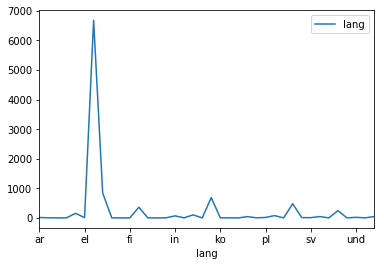

In [80]:
df.groupby("lang")[["lang"]].aggregate(count_nonzero).plot()

Each time you call `plot()` an `Axes` object is returned, and Jupyter knows how to paint those. `Axes` objects are objects of the underlying `matplotlib` library for plotting in Python, and as such, lots of different options can be given to customize the aspect.

Text(0.5,0,'# Tweets')

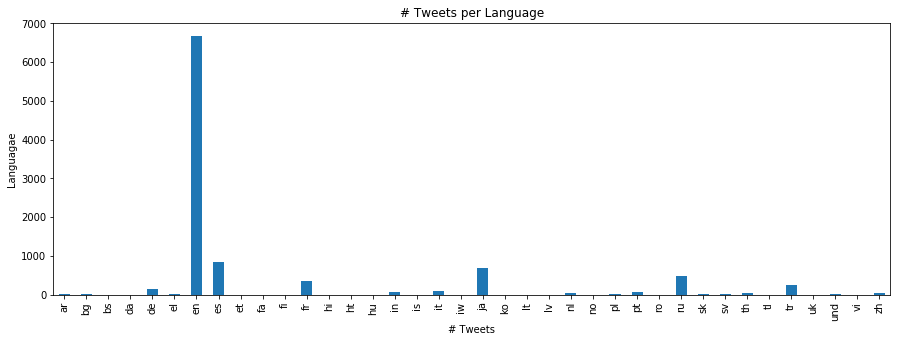

In [81]:
ax = df.groupby("lang")[["lang"]].aggregate(count_nonzero).plot(
    kind="bar",
    figsize=(15, 5),
    title="# Tweets per Language",
    legend=None
)
ax.set_ylabel("Languagae")
ax.set_xlabel("# Tweets")

`Axes` can also be created empty using `matplotlib` and then put some content in them.

In [ ]:
df.groupby(["lang"])[["text", ""]].aggregate({"lang": len, "length": np.mean})

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 5))
df.groupby("lang")[["lang"]].aggregate(count_nonzero).plot(ax=ax,
    kind="bar",
    title="# Tweets per Language",
    legend=None
)
ax.set_ylabel("Languagae")
ax.set_xlabel("# Tweets")

There are other styles available as well.

In [ ]:
plt.style.available

In [ ]:
with plt.style.context('ggplot'):
    df.groupby("lang")[["lang"]].aggregate(count_nonzero).plot()

In [ ]:
# Even a special one for XKCD!
with plt.xkcd():
    df.groupby("lang")[["lang"]].aggregate(count_nonzero).plot()
plt.rcdefaults()  # this is neede as XKCD style is a special case

`seaborn`, a convenience wrapper around `matplotlib`, changes the default style after being imported, but it can be reverted back easily setting the default style to `classic` using `plt.style.use("classic")`.

In [ ]:
import seaborn as sns
df.groupby("lang")[["lang"]].aggregate(count_nonzero).plot()

Let's create a histogram with the lengths of tweets.

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 5))
df["length"].hist(ax=ax, bins=15, normed=True, color='lightseagreen')
df["length"].plot(ax=ax, kind='kde', xlim=(0, 150), style='r--')
ax.set_title("Histogram of lengths of tweets")

Boxplots are available by default.

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))
df.boxplot(column="length", grid=False, ax=ax)

Although violinplots can be used through `seaborn`.

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))
sns.violinplot(y=df["length"], grid=False, ax=ax)

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Given the twitter `DataFrame`, let's try to find out visually if there is any sort of relationship between the length of a tweet and the number of hastags it uses.
</p>
</div>

In [ ]:
# Write your code here
def count_hashtags(text):
    links = filter(bool, text.split(","))
    count = len(list(links))
    return count

df["hashtags_count"] = df["hashtags"]...

fig, ax = plt.subplots(1, figsize=(15, 5))
ax.scatter(x=..., y=...)
ax.set_ylabel("Length")
ax.set_xlabel("# Hashtags")
ax.set_title("Tweets length by number of hashtags")

## Evaluation survey
Please, spend 1 minute answering these questions that can help us a lot on future workshops. 
- http://bit.ly/cidr-python-data-eval